In [181]:
import pickle
import numpy as np
from itertools import groupby
import pandas as pd
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import entr

In [348]:
n_fix = 1
ran_var = "True"
ran_int = 'False'
model = 'B'
a_type = 'tol' # either 'alpha' or 'tol'
tol = 0.5        # either 0.01, 0.05 or 0.1 for 'alpha'
                 # or 0.5, 0.75, 1, 1.25, 1.5 for 'tol'
                 # and 0.25, 0.5, 0.75, 1, 1.25 for 'tol' when model='P'
num = 500

file_name = 'output/simulation_study_results/' + ran_var + '_' + ran_int + '_' + str(n_fix) + '_' + a_type + '_' + str(tol) + '_' + model + '_' + str(num) + '.pickle'

all_knots, all_par, all_W, all_hess_ran, all_hess_fix, all_group, all_out_groups = pickle.load(open(file_name, 'rb'))

In [349]:
group=[]
for W in all_W:
    group.append(np.array([np.nan if np.sum(W[i,:])==0 else np.argmax(W[i,:]) for i in range(10)]))

group2=[]
group3=[]
group4=[]
for W in all_W:
  if W.shape[1]==2:
    group2.append(np.array([-1 if np.sum(W[i,:])==0 else np.argmax(W[i,:]) for i in range(10)]))
  if W.shape[1]==3:
    group3.append(np.array([-1 if np.sum(W[i,:])==0 else np.argmax(W[i,:]) for i in range(10)]))
  if W.shape[1]==4:
    group4.append(np.array([-1 if np.sum(W[i,:])==0 else np.argmax(W[i,:]) for i in range(10)]))

groups = []
k_tot = []
if group2 != []:
  groups.append(group2)
  k_tot.append(2)
if group3 != []:
  groups.append(group3)
  k_tot.append(3)
if group4 != []:
  groups.append(group4)
  k_tot.append(4)

In [350]:
p = 0
for j in groups: 
  k = k_tot[p]
  print('N groups: ' + str(k) + '\n')
  temp = []
  for i in j:
    temp.append( dict(Counter(i)) )

  for n in range(len(temp)-1):
    shared_keys = set(temp[n]).intersection(temp[n+1])
    if list(set(np.arange(k)) - shared_keys) != []:
      for m in list(set(np.arange(k)) - shared_keys):
        temp[n+1][m] = 0
        
  for n in range(len(temp)-1):
    temp[n+1][-1] = 0

  for key in sorted(temp[0].keys()):
    print(key)
    data = [w[key] for w in temp]
    print("key:\t" + str(key) + "\nMean (std):\t"+ str(np.around(np.mean(data)/10,2)) + "\t (" + str(np.around(np.std(data),2)) + ") \n \n")
  
  p = p + 1

N groups: 2

0
key:	0
Mean (std):	0.7	 (0.0) 
 

1
key:	1
Mean (std):	0.3	 (0.0) 
 

N groups: 3

0
key:	0
Mean (std):	0.2	 (0.09) 
 

1
key:	1
Mean (std):	0.5	 (0.16) 
 

2
key:	2
Mean (std):	0.3	 (0.13) 
 

N groups: 4

0
key:	0
Mean (std):	0.19	 (0.29) 
 

1
key:	1
Mean (std):	0.36	 (1.63) 
 

2
key:	2
Mean (std):	0.22	 (1.34) 
 

3
key:	3
Mean (std):	0.23	 (0.82) 
 



## PLOTS

In [351]:
if (n_fix == 1) & (ran_var=='True') & (ran_int=='True'):
  #pal = "YlOrBr"
  pal = 'Greys'
if (n_fix == 2) & (ran_var=='True') & (ran_int=='True'):
  #pal = "GnBu"
  pal = 'Greys'
if (n_fix == 1) & (ran_var=='True') & (ran_int=='False'):
  #pal = "Reds"
  pal = 'Greys'
if (n_fix == 2) & (ran_var=='True') & (ran_int=='False'):
  #pal = "BuGn"
  pal = 'Greys'
if (n_fix == 1) & (ran_var=='False') & (ran_int=='True'):
  #pal = "Oranges"
  pal = 'Greys'
if (n_fix == 2) & (ran_var=='False') & (ran_int=='True'):
  #pal = "YlGnBu"
  pal = 'Greys'

if a_type=='tol':
  X = [0.5, 0.75, 1, 1.25, 1.5]
  if model=='P':
      X = [0.25, 0.5, 0.75, 1, 1.25]
  
elif a_type=='alpha':
  X = [0.01, 0.05, 0.1]


ENTROPY = pd.DataFrame(columns=['D', 'Subpopulations', 'Entropy'])
PERCENTAGES = pd.DataFrame(columns=['D', 'Subpopulations', 'Percentages'])
VALUES2 = pd.DataFrame(columns=['D', 'Coefficients', 'Values', 'Subpopulations', 'K'])


for d in X:
  file_ = open('output/simulation_study_results/' + ran_var + '_' + ran_int + '_' + str(n_fix) + '_' + a_type + '_' + str(d) + '_' + model + '_500.pickle','rb')
  
  all_knots, all_par, all_W, all_hess_ran, all_hess_fix, all_group, all_out_groups = pickle.load(file_)

  mean_entropy = []
  subpops = []
  for W in all_W:
    entropy = []
    subpops.append(W.shape[1])
    for i in range(W.shape[0]):
        entropy.append(entr(W[i,:]).sum()/np.log(W.shape[1]))
    mean_entropy.append(np.mean(entropy))

  ENTROPY = pd.concat( [ENTROPY, pd.DataFrame( {'D':np.repeat(d,len(all_group)), 'Subpopulations': subpops, 'Entropy': mean_entropy})] )

  c1 = Counter(all_out_groups) 
  total = 1.0 * len(all_group) 
  for k in c1:
    c1[k] /= total

  PERCENTAGES = pd.concat( [PERCENTAGES, pd.DataFrame( {'D':np.repeat(d,len(dict(c1))), 'Subpopulations':dict(c1).keys(), 'Percentages':dict(c1).values() }) ] )


  if n_fix==2:
    names2 = ['β1', 'β2'] # β
    names3 = ['β1, β2'] # β
  else:
    names2 = ['β1']
    names3 = ['β1']

  if (ran_var == 'True') & (ran_int == 'False'):
      for k_ in range(len(all_knots)):
          if all_knots[k_].size == 3:
            VALUES2 = pd.concat( [VALUES2, pd.DataFrame( {'D': np.repeat(d, all_knots[k_].size  + all_par[k_].size),    
                                                          'Coefficients': np.concatenate( (['β0'], ['c1 [1]', 'c1 [2]', 'c1 [3]'], names2) )  , 
                                                          'Values' : np.concatenate(( np.array([all_par[k_][0]], float), all_knots[k_], all_par[k_][1:])),
                                                          'Subpopulations': np.repeat(3, all_knots[k_].size  + all_par[k_].size), 
                                                          'K': np.concatenate( (['β0'], np.repeat('c1', 3), names2) )  
                                                          } ) ])
          if all_knots[k_].size == 2: 
            VALUES2 = pd.concat( [VALUES2, pd.DataFrame( {'D': np.repeat(d, all_knots[k_].size  + all_par[k_].size),    
                                                          'Coefficients': np.concatenate( (['β0'], ['c1 [1]', 'c1 [2]'], names2) )  , 
                                                          'Values' : np.concatenate(( np.array([all_par[k_][0]], float), all_knots[k_], all_par[k_][1:])),
                                                          'Subpopulations': np.repeat(2, all_knots[k_].size  + all_par[k_].size),
                                                          'K': np.concatenate( (['β0'], np.repeat('c1', 2), names2) )} ) ])
          if all_knots[k_].size == 4:
            VALUES2 = pd.concat( [VALUES2, pd.DataFrame( {'D': np.repeat(d, all_knots[k_].size  + all_par[k_].size),    
                                                          'Coefficients': np.concatenate( (['β0'], ['c1 [1]', 'c1 [2]', 'c1 [3]', 'c1 [4]'], names2) )  , 
                                                          'Values' : np.concatenate(( np.array([all_par[k_][0]], float), all_knots[k_], all_par[k_][1:])),
                                                          'Subpopulations': np.repeat(4, all_knots[k_].size  + all_par[k_].size),
                                                          'K': np.concatenate( (['β0'], np.repeat('c1', 4), names2) )} ) ])
            
  if (ran_var == 'False') & (ran_int == 'True'):
       #print(all_knots)
       for k_ in range(len(all_knots)):
          if all_knots[k_].size == 3:
              VALUES2 = pd.concat( [VALUES2, pd.DataFrame( {'D': np.repeat(d, all_knots[k_].size + all_par[k_].size),    
                                                          'Coefficients': np.concatenate( (['c0 [1]', 'c0 [2]', 'c0 [3]'], names2) )  , 
                                                          'Values' : np.concatenate((all_knots[k_], all_par[k_])),
                                                           'Subpopulations': np.repeat(3, all_knots[k_].size + all_par[k_].size),
                                                            'K': np.concatenate( (np.repeat('c0', 3), names2) )} ) ])
          if all_knots[k_].size == 2:
              VALUES2 = pd.concat( [VALUES2, pd.DataFrame( {'D': np.repeat(d, all_knots[k_].size + all_par[k_].size),    
                                                          'Coefficients': np.concatenate( (['c0 [1]', 'c0 [2]'], names2) )  , 
                                                          'Values' : np.concatenate((all_knots[k_], all_par[k_])),
                                                           'Subpopulations': np.repeat(2, all_knots[k_].size + all_par[k_].size),
                                                            'K': np.concatenate( (np.repeat('c0', 2), names2) )} ) ])
          if all_knots[k_].size == 4:
              VALUES2 = pd.concat( [VALUES2, pd.DataFrame( {'D': np.repeat(d, all_knots[k_].size + all_par[k_].size),    
                                                          'Coefficients': np.concatenate( (['c0 [1]', 'c0 [2]', 'c0 [3]', 'c0 [4]'], names2) )  , 
                                                          'Values' : np.concatenate((all_knots[k_], all_par[k_])),
                                                           'Subpopulations': np.repeat(4, all_knots[k_].size + all_par[k_].size),
                                                            'K': np.concatenate( (np.repeat('c0', 4), names2) )} ) ])
  if (ran_var == 'True') & (ran_int == 'True'):
       for k_ in range(len(all_knots)):
          #print(all_knots[k_].size)
          if all_knots[k_].size == 3*2:
             VALUES2 = pd.concat( [VALUES2, pd.DataFrame( {'D': np.repeat(d, all_knots[k_].size + all_par[k_].size),    
                                                    'Coefficients': np.concatenate( (['c0 [1]', 'c0 [2]', 'c0 [3]'], ['c1 [1]', 'c1 [2]', 'c1 [3]'], names2 ) ) , 
                                                    'Values' : np.concatenate((all_knots[k_].flatten(order='F'), all_par[k_])),
                                                     'Subpopulations': np.repeat(3, all_knots[k_].size + all_par[k_].size),
                                                     'K': np.concatenate( (np.repeat('c0', 3), np.repeat('c1', 3), names2) )} ) ])
          if all_knots[k_].size == 2*2:
             VALUES2 = pd.concat( [VALUES2, pd.DataFrame( {'D': np.repeat(d, all_knots[k_].size + all_par[k_].size),    
                                                    'Coefficients': np.concatenate( (['c0 [1]', 'c0 [2]'], ['c1 [1]', 'c1 [2]'], names2 ) ) , 
                                                    'Values' : np.concatenate((all_knots[k_].flatten(order='F'), all_par[k_])),
                                                     'Subpopulations': np.repeat(2, all_knots[k_].size + all_par[k_].size),
                                                     'K': np.concatenate( (np.repeat('c0', 2), np.repeat('c1', 2), names2) )} ) ])
          if all_knots[k_].size == 4*2:
            VALUES2 = pd.concat( [VALUES2, pd.DataFrame( {'D': np.repeat(d, all_knots[k_].size + all_par[k_].size),    
                                                    'Coefficients': np.concatenate( (['c0 [1]', 'c0 [2]', 'c0 [3]', 'c0 [4]'], ['c1 [1]', 'c1 [2]', 'c1 [3]', 'c1 [4]'], names2 ) ) , 
                                                    'Values' : np.concatenate((all_knots[k_].flatten(order='F'), all_par[k_])),
                                                     'Subpopulations': np.repeat(4, all_knots[k_].size + all_par[k_].size),
                                                     'K': np.concatenate( (np.repeat('c0', 4), np.repeat('c1', 4), names2) )} ) ])


VALUES2.index= range(0,VALUES2.shape[0])
#VALUES2

In [352]:
round(VALUES2.groupby(['Coefficients', 'D', 'Subpopulations']).count()/500,3).rename(columns={'Values':'Proportion','K' : 'Proportion'}).iloc[:,1:2]

Proportion
Coefficients D    Subpopulations            
c1 [1]       0.50 2                    0.022
                  3                    0.704
                  4                    0.230
             0.75 2                    0.058
                  3                    0.754
...                                      ...
β1           1.25 3                    0.614
                  4                    0.018
             1.50 2                    0.574
                  3                    0.420
                  4                    0.006

[75 rows x 1 columns]

In [353]:
VALUES2

,D,Coefficients,Values,Subpopulations,K
0,0.5,β0,8.938399,3,β0
1,0.5,c1 [1],8.400420,3,c1
2,0.5,c1 [2],4.316672,3,c1
3,0.5,c1 [3],0.145549,3,c1
4,0.5,β1,-5.175555,3,β1
...,...,...,...,...,...
11989,1.5,β1,-6.228883,3,β1
11990,1.5,β0,7.684689,2,β0
11991,1.5,c1 [1],5.033377,2,c1
11992,1.5,c1 [2],0.265209,2,c1


In [354]:
temp = pd.concat([np.around(VALUES2.groupby(['D', 'Subpopulations', 'Coefficients', 'K']).mean(), 2), np.around(VALUES2.groupby(['D', 'Subpopulations', 'Coefficients', 'K']).std(), 2)], axis=1)
temp.columns = ['mean (coefficients)', 'sd']
temp

mean (coefficients)    sd
D   Subpopulations Coefficients K                            
0.5 2              c1 [1]       c1                 4.49  0.57
                   c1 [2]       c1                 0.08  0.44
                   β0           β0                 7.21  0.93
                   β1           β1                -4.22  0.59
    3              c1 [1]       c1                10.58  1.72
...                                                 ...   ...
1.5 4              c1 [2]       c1                 6.70  0.35
                   c1 [3]       c1                 3.05  3.10
                   c1 [4]       c1                -1.96  2.20
                   β0           β0                12.05  1.12
                   β1           β1                -7.24  0.69

[75 rows x 2 columns]

In [355]:
temp2 = pd.concat([np.around(ENTROPY.groupby(['D','Subpopulations']).mean(), 3), np.around(ENTROPY.groupby(['D','Subpopulations']).std(), 2)], axis=1)
temp2.columns = ['Entropy', 'sd']
temp2

Entropy    sd
D    Subpopulations               
0.50 2                 0.002  0.00
     3                 0.005  0.01
     4                 0.072  0.05
     5                 0.128  0.05
     6                 0.127  0.06
0.75 2                 0.008  0.02
     3                 0.005  0.01
     4                 0.071  0.04
     5                 0.110  0.04
1.00 2                 0.009  0.02
     3                 0.007  0.02
     4                 0.064  0.04
     5                 0.091   NaN
1.25 2                 0.010  0.02
     3                 0.005  0.01
     4                 0.049  0.03
1.50 2                 0.011  0.03
     3                 0.006  0.02
     4                 0.079  0.05

## PLOTS for BERNOULLI

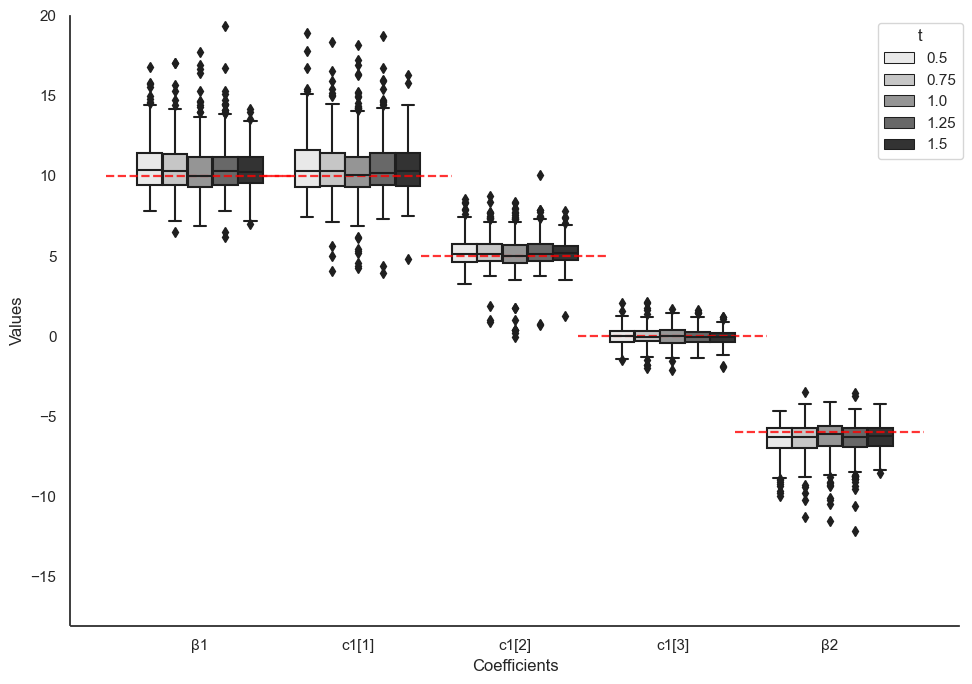

In [356]:
plt.figure(figsize=(10,7))
plt.ylim(-18, 20)

ax = sns.boxplot(
    data=VALUES2.loc[VALUES2['Subpopulations']==3, ],
    x="Coefficients", y="Values", palette=pal,
    hue='D'#, col="Coefficient"
)
#sns.despine(offset=10, trim=True)
sns.despine(offset=1, left=False, bottom=False)
if a_type=='alpha':
    plt.legend(bbox_to_anchor=(0.9, 1), loc='upper left',  title="α")#, title="t") # 
else:
    plt.legend(bbox_to_anchor=(0.9, 1), loc='upper left',  title="t") #

if (ran_var=='False') & (ran_int=='True'):
  ax.axes.hlines( y = 5, color='red', linewidth=1.6, alpha=.8, xmin = -0.6, xmax = 0.6, ls='--')
  ax.axes.hlines( y = 2, color='red', linewidth=1.6, alpha=.8, xmin = 0.4, xmax = 1.6, ls='--')
  ax.axes.hlines( y = -10, color='red', linewidth=1.6, alpha=.8, xmin = 1.4, xmax = 2.6, ls='--') 
  ax.axes.hlines( y = -6, color='red', linewidth=1.6, alpha=.8, xmin = 2.4, xmax = 3.6, ls='--') 
  #ax.axes.hlines( y = 3, color='red', linewidth=1.6, alpha=.8, xmin = 3.4, xmax = 4.6, ls='--') 

if (ran_var=='True') & (ran_int=='False'):
  ax.axes.hlines( y = 10, color='red', linewidth=1.6, alpha=.8, xmin = -0.6, xmax = 0.6, ls='--')
  ax.axes.hlines( y = 10, color='red', linewidth=1.6, alpha=.8, xmin = -0.6+1, xmax = 0.6+1, ls='--')
  ax.axes.hlines( y = 5, color='red', linewidth=1.6, alpha=.8, xmin = 0.4+1, xmax = 1.6+1, ls='--')
  ax.axes.hlines( y = 0, color='red', linewidth=1.6, alpha=.8, xmin = 1.4+1, xmax = 2.6+1, ls='--') 
  ax.axes.hlines( y = -6, color='red', linewidth=1.6, alpha=.8, xmin = 2.4+1, xmax = 3.6+1, ls='--') 
  #ax.axes.hlines( y = 3, color='red', linewidth=1.6, alpha=.8, xmin = 3.4+1, xmax = 4.6 +1, ls='--') 
  ax.axes.set_xticklabels(['β1', 'c1[1]', 'c1[2]', 'c1[3]', 'β2'])

if (ran_var=='True') & (ran_int=='True'):
  ax.axes.hlines( y = 5, color='red', linewidth=1.6, alpha=.8, xmin = -0.6, xmax = 0.6, ls='--')
  ax.axes.hlines( y = 2, color='red', linewidth=1.6, alpha=.8, xmin = 0.4, xmax = 1.6, ls='--')
  ax.axes.hlines( y = -10, color='red', linewidth=1.6, alpha=.8, xmin = 1.4, xmax = 2.6, ls='--') 

  ax.axes.hlines( y = 10, color='red', linewidth=1.6, alpha=.8, xmin = 2.4, xmax = 3.6, ls='--')
  ax.axes.hlines( y = 5, color='red', linewidth=1.6, alpha=.8, xmin = 3.4, xmax = 4.6, ls='--')
  ax.axes.hlines( y = 0, color='red', linewidth=1.6, alpha=.8, xmin = 4.4, xmax = 5.6, ls='--') 

  ax.axes.hlines( y = -6, color='red', linewidth=1.6, alpha=.8, xmin = 5.4, xmax = 6.6, ls='--') 
  #ax.axes.hlines( y = 3, color='red', linewidth=1.6, alpha=.8, xmin = 6.4, xmax = 7.6, ls='--') 


plt.tight_layout()
#plt.savefig(str(ran_var) + "_" + str(ran_int) + "_" + str(n_fix) + "_3groups_" + str(a_type) + '_' + str(model) + ".pdf")

In [357]:
if ran_int == 'True':
  plt.figure(figsize=(10,7))
  plt.ylim(-18, 10)

  ax = sns.boxplot(
    data=VALUES2.loc[(VALUES2['K']=='c0'), ],
    x="Subpopulations", y="Values", palette='Greys', #'colorblind',
    hue='Coefficients'#, col="Coefficient"
  )#.set_title('c1', fontsize=20)
  sns.despine(offset=1, left=False, bottom=False)
  plt.xlabel("Clusters")
  # labels = ['c1[1]', 'c1[2]', 'c1[3]', 'c1[4]'], 
  plt.legend(bbox_to_anchor=(0.9, 1), loc='upper left', title="Coefficients")

  ax.axes.hlines( y = 5, color='red', linewidth=1.6, alpha=.8, xmin = -0.5, xmax = -0.1, ls='--')
  ax.axes.hlines( y = 2, color='red', linewidth=1.6, alpha=.8, xmin = -0.5, xmax = -0.1, ls='--')
  ax.axes.hlines( y = -10, color='red', linewidth=1.6, alpha=.8, xmin = -0.3, xmax = 0.1, ls='--') 

  y=1
  ax.axes.hlines( y = 5, color='red', linewidth=1.6, alpha=.8, xmin = -0.5+y, xmax = -0.1+y, ls='--')
  ax.axes.hlines( y = 2, color='red', linewidth=1.6, alpha=.8, xmin = -0.5+y+0.2, xmax = -0.1+y+0.2, ls='--')
  ax.axes.hlines( y = -10, color='red', linewidth=1.6, alpha=.8, xmin = -0.3+y+0.2, xmax = 0.1+y+0.2, ls='--') 

  y=2
  ax.axes.hlines( y = 5, color='red', linewidth=1.6, alpha=.8, xmin = -0.5+y, xmax = -0.1+y+0.1, ls='--')
  ax.axes.hlines( y = 2, color='red', linewidth=1.6, alpha=.8, xmin = -0.5+y+0.19, xmax = -0.1+y+0.3, ls='--')
  ax.axes.hlines( y = -10, color='red', linewidth=1.6, alpha=.8, xmin = -0.3+y+0.19, xmax = 0.1+y+0.4, ls='--') 

plt.tight_layout()
#plt.savefig(str(ran_var) + "_" + str(ran_int) + "_" + str(n_fix) + "_c1_" + str(a_type) + '_' + str(model) + ".pdf")

<Figure size 1000x500 with 0 Axes>

In [358]:
if ran_int == 'True':
  for i in range(2,5):
    plt.figure(figsize=(10,7))
    plt.ylim(-18, 10)

    ax = sns.boxplot(
      data=VALUES2.loc[(VALUES2['K']=='c0') & (VALUES2['Subpopulations']==i), ],
      x="Coefficients", y="Values", palette=pal,
      hue='D'#, col="Coefficient"
    )#.set_title(str(i) + ' clusters', fontsize=20)
    sns.despine(offset=1, left=False, bottom=False)
    if a_type=='alpha':
        plt.legend(bbox_to_anchor=(0.9, 1), loc='upper left',  title="α")#, title="t") # 
    else:
        plt.legend(bbox_to_anchor=(0.9, 1), loc='upper left',  title="t") #)

    if i==2:
      ax.axes.hlines( y = 5, color='red', linewidth=1.6, alpha=.8, xmin = -0.6, xmax = 0.6, ls='--')
      ax.axes.hlines( y = 2, color='red', linewidth=1.6, alpha=.8, xmin = -0.6, xmax = 0.6, ls='--')
      ax.axes.hlines( y = -10, color='red', linewidth=1.6, alpha=.8, xmin = 0.4, xmax = 1.6, ls='--') 
      ax.axes.set_xticklabels(['c1[1]','c1[2]'])
    if i==3:
      ax.axes.hlines( y = 5, color='red', linewidth=1.6, alpha=.8, xmin = -0.6, xmax = 0.6, ls='--')
      ax.axes.hlines( y = 2, color='red', linewidth=1.6, alpha=.8, xmin = 0.4, xmax = 1.6, ls='--')
      ax.axes.hlines( y = -10, color='red', linewidth=1.6, alpha=.8, xmin = 1.4, xmax = 2.6, ls='--') 
      ax.axes.set_xticklabels(['c1[1]','c1[2]', 'c1[3]'])
    if i==4:
      ax.axes.hlines( y = 5, color='red', linewidth=1.6, alpha=.8, xmin = -0.6, xmax = 0.6, ls='--')
      ax.axes.hlines( y = 2, color='red', linewidth=1.6, alpha=.8, xmin = 0.4, xmax = 2.6, ls='--')
      ax.axes.hlines( y = -10, color='red', linewidth=1.6, alpha=.8, xmin = 1.4, xmax = 3.6, ls='--') 
      ax.axes.set_xticklabels(['c1[1]','c1[2]', 'c1[3]', 'c1[4]'])
    
    plt.tight_layout()
    # plt.savefig(str(ran_var) + "_" + str(ran_int) + "_" + str(n_fix) + "_" + "c1_" + str(i) + '_' + str(a_type) + '_' + str(model) + ".pdf")

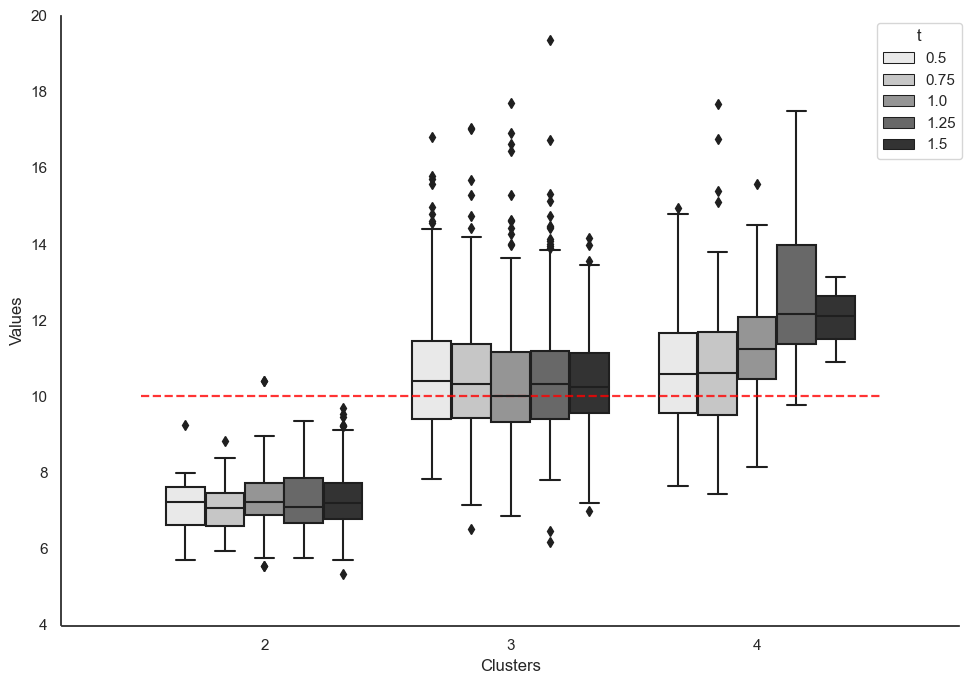

In [359]:
if ran_int == 'False': #β0
  plt.figure(figsize=(10,7))
  plt.ylim(4, 20)

  ax = sns.boxplot(
    data=VALUES2.loc[VALUES2['K']=='β0', ],
    x="Subpopulations", y="Values", palette=pal,
    hue='D'#, col="Coefficient"
  )#.set_title('β0', fontsize=20)
  sns.despine(offset=1, left=False, bottom=False)
  if a_type=='alpha':
        plt.legend(bbox_to_anchor=(0.9, 1), loc='upper left',  title="α")#, title="t") # 
  else:
        plt.legend(bbox_to_anchor=(0.9, 1), loc='upper left',  title="t") #)
  ax.axes.hlines( y = 10, color='red', linewidth=1.6, alpha=.8, xmin = -0.5, xmax = 2.5, ls='--')

  plt.xlabel("Clusters")
  plt.tight_layout()
  # plt.savefig(str(ran_var) + "_" + str(ran_int) + "_" + str(n_fix) + "_" + "beta0" + '_' + str(a_type) + '_' + str(model) + ".pdf")

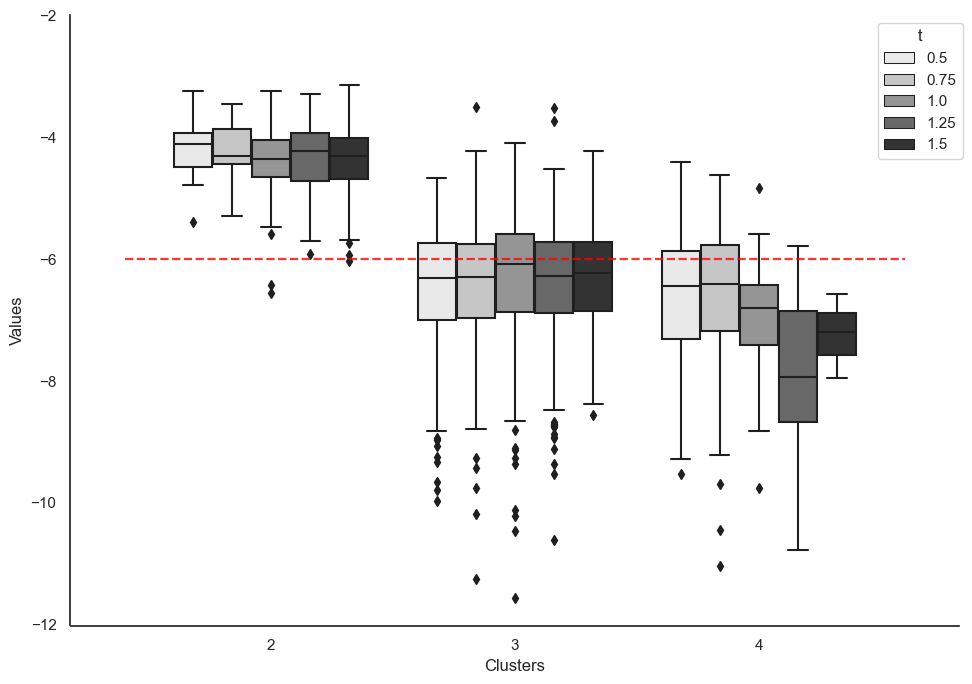

In [360]:
for i in names2: # sono β1 e β2
  plt.figure(figsize=(10,7))
  if i=='β1':
      plt.ylim(-12, -2)
  if i=='β2':
      plt.ylim(-1, 7)
  ax = sns.boxplot(
    data=VALUES2.loc[VALUES2['K']==i, ],
    x="Subpopulations", y="Values", palette=pal,
    hue='D'#, col="Coefficient"
  )#.set_title(i, fontsize=20)
  sns.despine(offset=1, left=False, bottom=False)
  plt.xlabel("Clusters")
  if a_type=='alpha':
    plt.legend(bbox_to_anchor=(0.9, 1), loc='upper left',  title="α")#, title="t") # 
  else:
    plt.legend(bbox_to_anchor=(0.9, 1), loc='upper left',  title="t") #


  if i=='β1':
      ax.axes.hlines( y = -6, color='red', linewidth=1.6, alpha=.8, xmin = -0.6, xmax = 2.6, ls='--')
      plt.tight_layout()
      # plt.savefig(str(ran_var) + "_" + str(ran_int) + "_" + str(n_fix) + "_" + "beta1" + '_' + str(a_type) + '_' + str(model) + ".pdf")
  if i=='β2':
      ax.axes.hlines( y = 3, color='red', linewidth=1.6, alpha=.8, xmin = -0.6, xmax = 2.6, ls='--')
      plt.tight_layout()
      # plt.savefig(str(ran_var) + "_" + str(ran_int) + "_" + str(n_fix) + "_" + "beta2" + '_' + str(a_type) + '_' + str(model) + ".pdf")

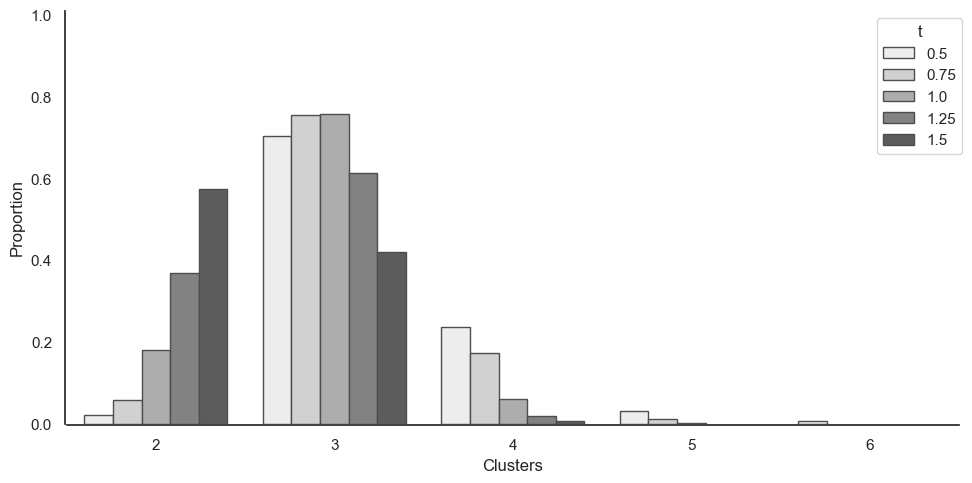

In [361]:
plt.figure(figsize=(10,5))
plt.ylim(0, 1.01)
sns.set_theme(style="ticks", palette=pal) 
ax = sns.barplot(x='Subpopulations', y='Percentages', hue='D', data=PERCENTAGES, edgecolor=".3")#.set_title('Proportion in clusters', fontsize=20)
plt.xlabel("Clusters")
plt.ylabel("Proportion")
if a_type=='alpha':
  plt.legend(bbox_to_anchor=(0.9, 1), loc='upper left',  title="α")#, title="t") # 
else:
  plt.legend(bbox_to_anchor=(0.9, 1), loc='upper left',  title="t") #
#sns.despine(offset=10, trim=True)
sns.despine(offset=1, left=False, bottom=False)
plt.tight_layout()
#plt.savefig(str(ran_var) + "_" + str(ran_int) + "_" + str(n_fix) + "_distribution_" + str(a_type) + "_" + str(model) + ".pdf")

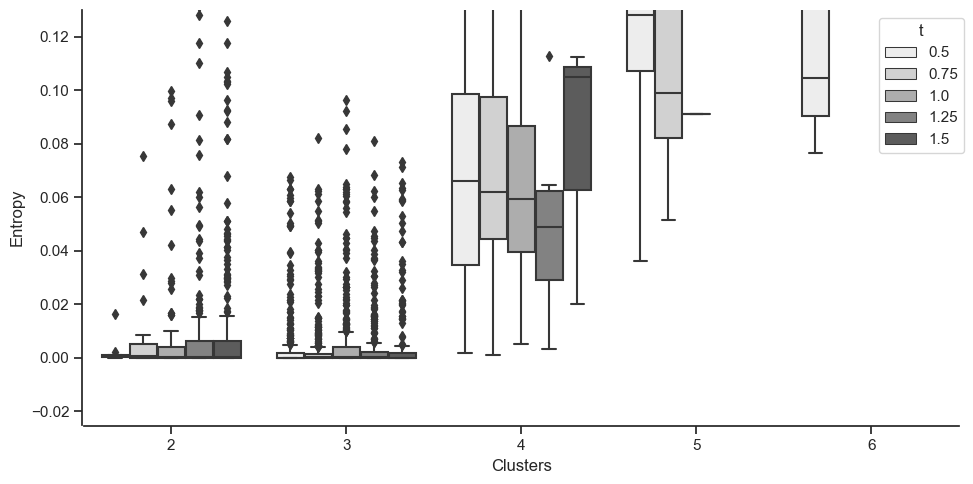

In [362]:
plt.figure(figsize=(10,5))
#plt.ylim(-0.05, 0.36)
plt.ylim(-0.025, 0.13)
sns.set_theme(style="ticks", palette=pal) 
ax = sns.boxplot(x='Subpopulations', y='Entropy', hue='D', data=ENTROPY)#.set_title('Entropy', fontsize=20)
plt.xlabel("Clusters")
if a_type=='alpha':
  plt.legend(bbox_to_anchor=(0.9, 1), loc='upper left',  title="α")#, title="t") # 
else:
  plt.legend(bbox_to_anchor=(0.9, 1), loc='upper left',  title="t") #
#sns.despine(offset=10, trim=True)
sns.despine(offset=1, left=False, bottom=False)
plt.tight_layout()
plt.savefig(str(ran_var) + "_" + str(ran_int) + "_" + str(n_fix) + "_entropy_" + str(a_type)+ "_" + str(model) + ".pdf")

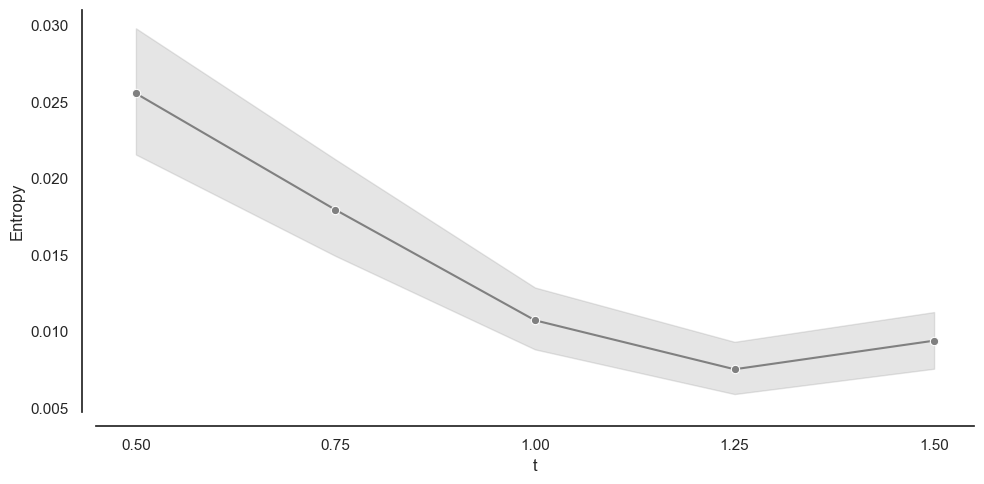

In [363]:
if a_type == 'tol':

  df = ENTROPY#.loc[ENTROPY['Subpopulations']==3, ]

  df.index= range(0,df.shape[0])

  sns.set(rc={"figure.figsize":(10,5)})
  sns.set_theme(palette='binary', style="white")
  fig, ax = plt.subplots()
  sns.lineplot(ax = ax,
             data = df,
             x = 'D',
             y = 'Entropy',
             sort = False,
             marker="o",
             #errorbar=('ci', 95),
             markers=True,
             color='gray')
  sns.despine(offset=10)#, trim=True)
  ax.set_xlim(0.45,1.55)
  ax.set_xticks([0.5,0.75,1,1.25,1.5])
  plt.xlabel('t')
  #plt.title('(c) Elbow method for DGP (iii) - Bernoulli')
  plt.tight_layout()

  plt.savefig(str(ran_var) + "_" + str(ran_int) + "_" + str(n_fix) + "_" + "elbow" + "_" + str(model) + "_" + str(a_type) + ".pdf")

## PLOTS for POISSON

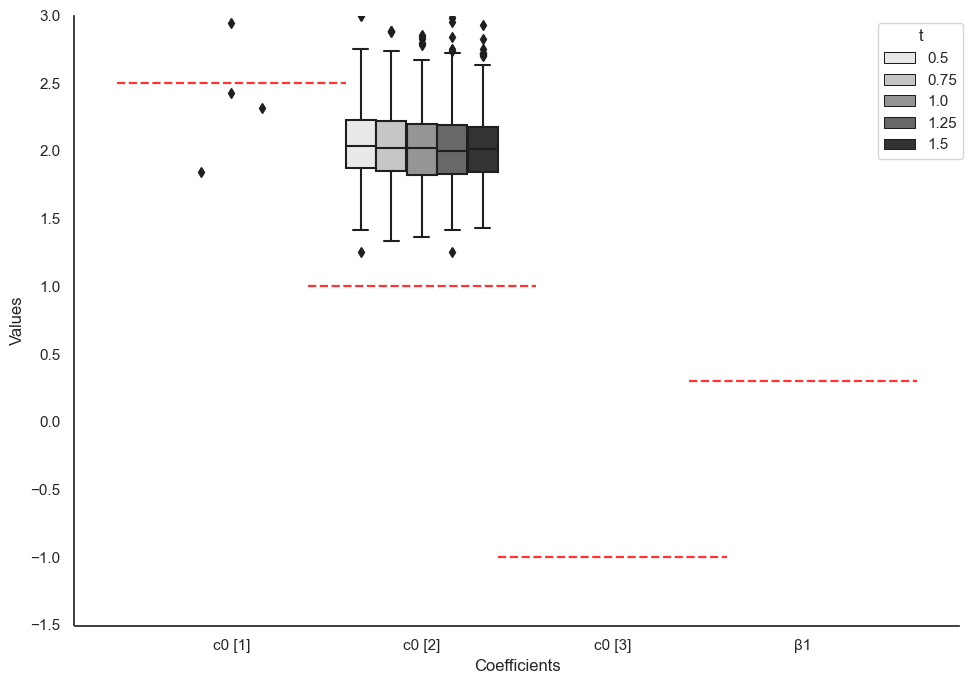

In [254]:
plt.figure(figsize=(10,7))
plt.ylim(-1.5, 3)

ax = sns.boxplot(
    data=VALUES2.loc[VALUES2['Subpopulations']==3, ],
    x="Coefficients", y="Values", palette=pal,
    hue='D'#, col="Coefficient"
)
#sns.despine(offset=10, trim=True)
sns.despine(offset=1, left=False, bottom=False)
if a_type=='alpha':
    plt.legend(bbox_to_anchor=(0.9, 1), loc='upper left',  title="α")#, title="t") # 
else:
    plt.legend(bbox_to_anchor=(0.9, 1), loc='upper left',  title="t") #

if (ran_var=='False') & (ran_int=='True'):
  ax.axes.hlines( y = 2.5, color='red', linewidth=1.6, alpha=.8, xmin = -0.6, xmax = 0.6, ls='--')
  ax.axes.hlines( y = 1, color='red', linewidth=1.6, alpha=.8, xmin = 0.4, xmax = 1.6, ls='--')
  ax.axes.hlines( y = -1, color='red', linewidth=1.6, alpha=.8, xmin = 1.4, xmax = 2.6, ls='--') 
  ax.axes.hlines( y = 0.3, color='red', linewidth=1.6, alpha=.8, xmin = 2.4, xmax = 3.6, ls='--') 
  #ax.axes.hlines( y = 3, color='red', linewidth=1.6, alpha=.8, xmin = 3.4, xmax = 4.6, ls='--') 

plt.tight_layout()
# plt.savefig(str(ran_var) + "_" + str(ran_int) + "_" + str(n_fix) + "_3groups_" + str(a_type) + '_' + str(model) + ".pdf")

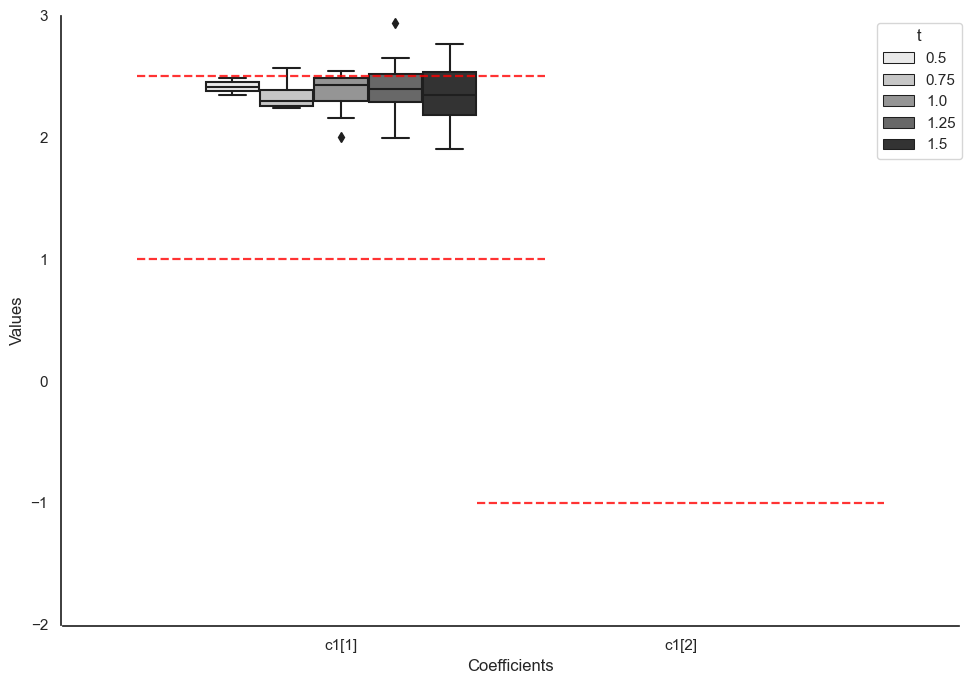

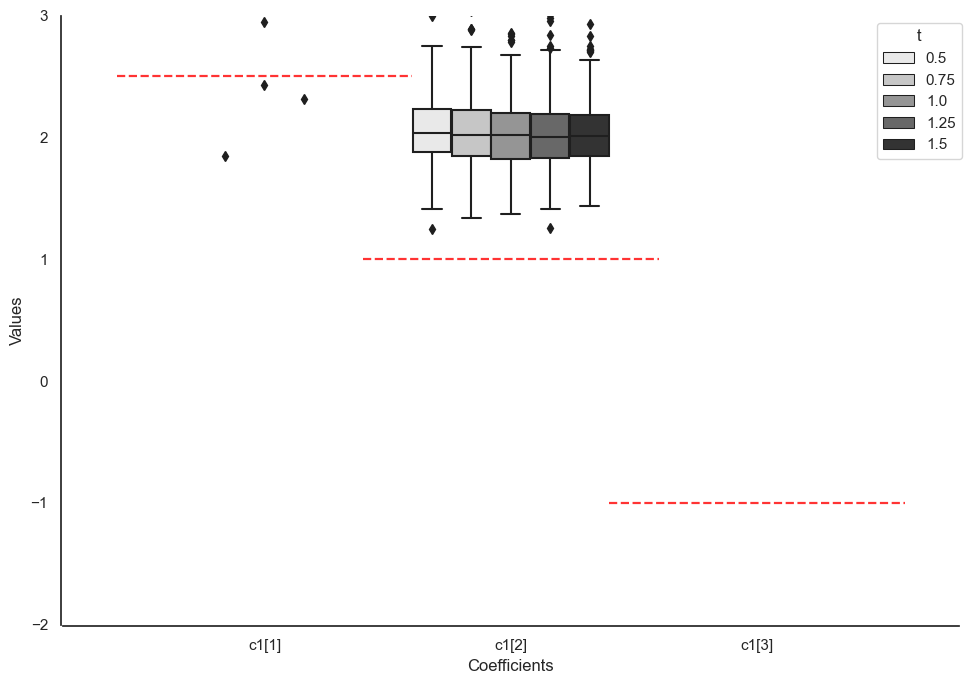

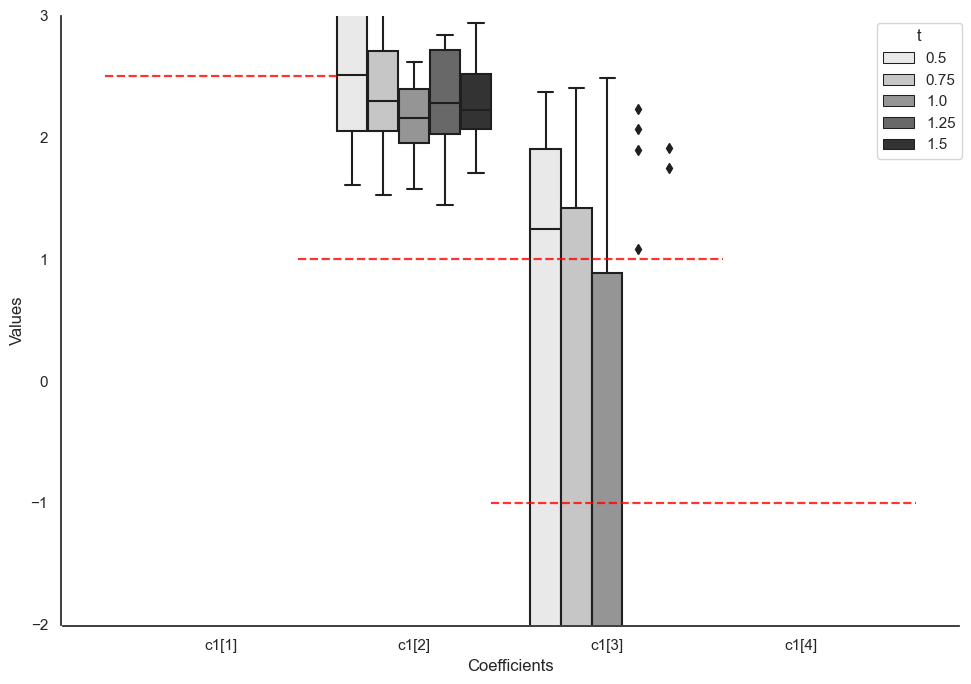

In [255]:
if ran_int == 'True':
  for i in range(2,5):
    plt.figure(figsize=(10,7))
    plt.ylim(-2, 3)

    ax = sns.boxplot(
      data=VALUES2.loc[(VALUES2['K']=='c0') & (VALUES2['Subpopulations']==i), ],
      x="Coefficients", y="Values", palette=pal,
      hue='D'#, col="Coefficient"
    )#.set_title(str(i) + ' clusters', fontsize=20)
    sns.despine(offset=1, left=False, bottom=False)
    if a_type=='alpha':
        plt.legend(bbox_to_anchor=(0.9, 1), loc='upper left',  title="α")#, title="t") # 
    else:
        plt.legend(bbox_to_anchor=(0.9, 1), loc='upper left',  title="t") #)

    if i==2:
      ax.axes.hlines( y = 2.5, color='red', linewidth=1.6, alpha=.8, xmin = -0.6, xmax = 0.6, ls='--')
      ax.axes.hlines( y = 1, color='red', linewidth=1.6, alpha=.8, xmin = -0.6, xmax = 0.6, ls='--')
      ax.axes.hlines( y = -1, color='red', linewidth=1.6, alpha=.8, xmin = 0.4, xmax = 1.6, ls='--') 
      ax.axes.set_xticklabels(['c1[1]','c1[2]'])
    if i==3:
      ax.axes.hlines( y = 2.5, color='red', linewidth=1.6, alpha=.8, xmin = -0.6, xmax = 0.6, ls='--')
      ax.axes.hlines( y = 1, color='red', linewidth=1.6, alpha=.8, xmin = 0.4, xmax = 1.6, ls='--')
      ax.axes.hlines( y = -1, color='red', linewidth=1.6, alpha=.8, xmin = 1.4, xmax = 2.6, ls='--') 
      ax.axes.set_xticklabels(['c1[1]','c1[2]', 'c1[3]'])
    if i==4:
      ax.axes.hlines( y = 2.5, color='red', linewidth=1.6, alpha=.8, xmin = -0.6, xmax = 0.6, ls='--')
      ax.axes.hlines( y = 1, color='red', linewidth=1.6, alpha=.8, xmin = 0.4, xmax = 2.6, ls='--')
      ax.axes.hlines( y = -1, color='red', linewidth=1.6, alpha=.8, xmin = 1.4, xmax = 3.6, ls='--') 
      ax.axes.set_xticklabels(['c1[1]','c1[2]', 'c1[3]', 'c1[4]'])
    
    plt.tight_layout()
    # plt.savefig(str(ran_var) + "_" + str(ran_int) + "_" + str(n_fix) + "_" + "c1_" + str(i) + '_' + str(a_type) + '_' + str(model) + ".pdf")

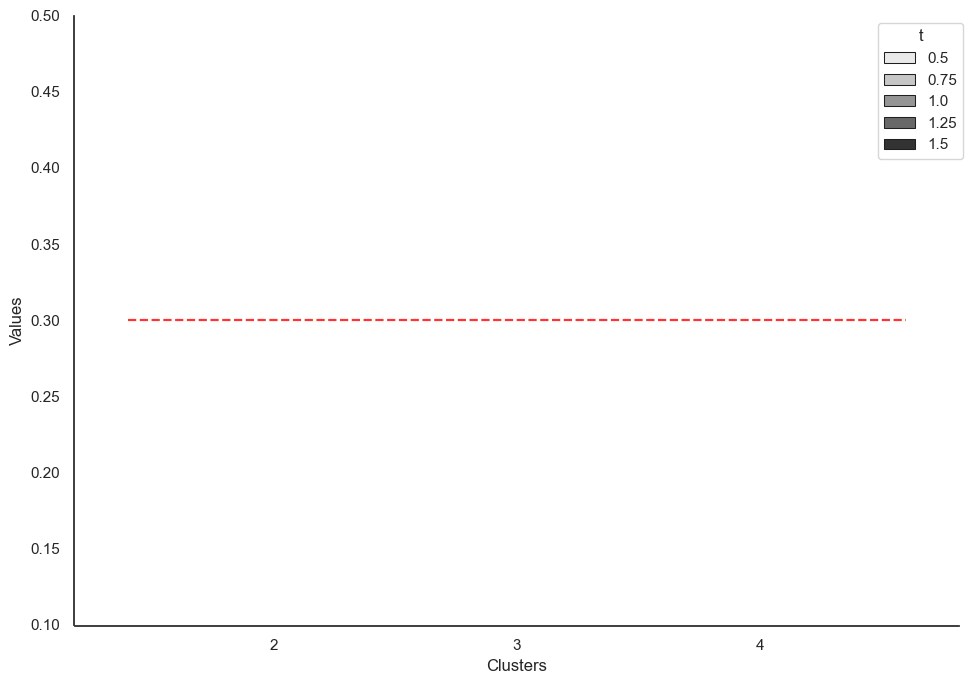

In [256]:
for i in names2: # sono β1 e β2
  plt.figure(figsize=(10,7))
  if i=='β1':
      plt.ylim(0.1, 0.5)
  if i=='β2':
      plt.ylim(0, 1.5)
  ax = sns.boxplot(
    data=VALUES2.loc[VALUES2['K']==i, ],
    x="Subpopulations", y="Values", palette=pal,
    hue='D'#, col="Coefficient"
  )#.set_title(i, fontsize=20)
  sns.despine(offset=1, left=False, bottom=False)
  plt.xlabel("Clusters")
  if a_type=='alpha':
    plt.legend(bbox_to_anchor=(0.9, 1), loc='upper left',  title="α")#, title="t") # 
  else:
    plt.legend(bbox_to_anchor=(0.9, 1), loc='upper left',  title="t") #


  if i=='β1':
      ax.axes.hlines( y = 0.3, color='red', linewidth=1.6, alpha=.8, xmin = -0.6, xmax = 2.6, ls='--')
      plt.tight_layout()
      # plt.savefig(str(ran_var) + "_" + str(ran_int) + "_" + str(n_fix) + "_" + "beta1" + '_' + str(a_type) + '_' + str(model) + ".pdf")
  if i=='β2':
      ax.axes.hlines( y = 0.9, color='red', linewidth=1.6, alpha=.8, xmin = -0.6, xmax = 2.6, ls='--')
      plt.tight_layout()
      # plt.savefig(str(ran_var) + "_" + str(ran_int) + "_" + str(n_fix) + "_" + "beta2" + '_' + str(a_type) + '_' + str(model) + ".pdf")

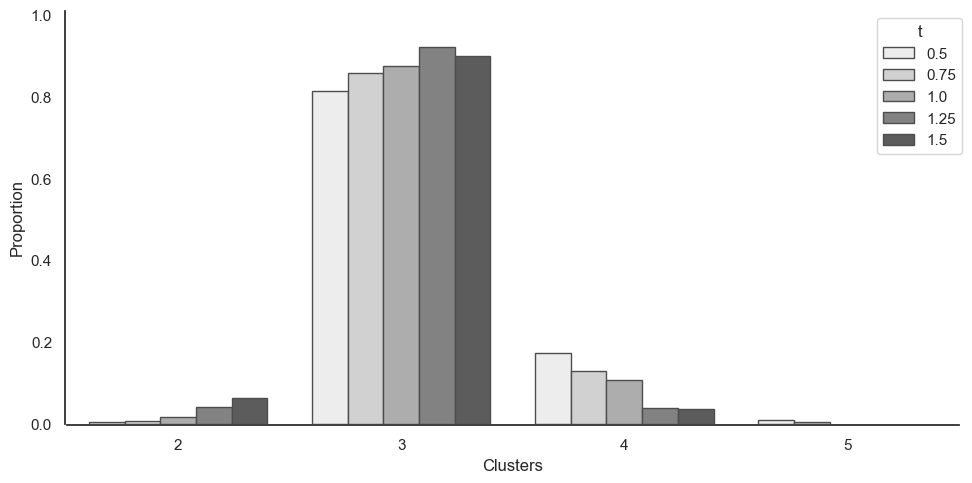

In [257]:
plt.figure(figsize=(10,5))
plt.ylim(0, 1.01)
sns.set_theme(style="ticks", palette=pal) 
ax = sns.barplot(x='Subpopulations', y='Percentages', hue='D', data=PERCENTAGES, edgecolor=".3")#.set_title('Proportion in clusters', fontsize=20)
plt.xlabel("Clusters")
plt.ylabel("Proportion")
if a_type=='alpha':
  plt.legend(bbox_to_anchor=(0.9, 1), loc='upper left',  title="α")#, title="t") # 
else:
  plt.legend(bbox_to_anchor=(0.9, 1), loc='upper left',  title="t") #
#sns.despine(offset=10, trim=True)
sns.despine(offset=1, left=False, bottom=False)
plt.tight_layout()
#plt.savefig(str(ran_var) + "_" + str(ran_int) + "_" + str(n_fix) + "_distribution_" + str(a_type) + "_" + str(model) + ".pdf")

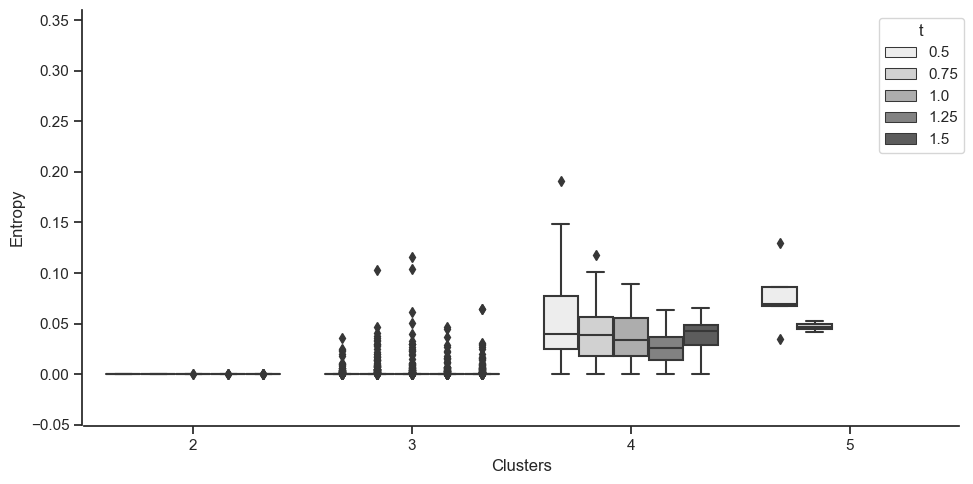

In [258]:
plt.figure(figsize=(10,5))
plt.ylim(-0.05, 0.36)
sns.set_theme(style="ticks", palette=pal) 
ax = sns.boxplot(x='Subpopulations', y='Entropy', hue='D', data=ENTROPY)#.set_title('Entropy', fontsize=20)
plt.xlabel("Clusters")
if a_type=='alpha':
  plt.legend(bbox_to_anchor=(0.9, 1), loc='upper left',  title="α")#, title="t") # 
else:
  plt.legend(bbox_to_anchor=(0.9, 1), loc='upper left',  title="t") #
#sns.despine(offset=10, trim=True)
sns.despine(offset=1, left=False, bottom=False)
plt.tight_layout()
#plt.savefig(str(ran_var) + "_" + str(ran_int) + "_" + str(n_fix) + "_entropy_" + str(a_type)+ "_" + str(model) + ".pdf")

### Elbow plot

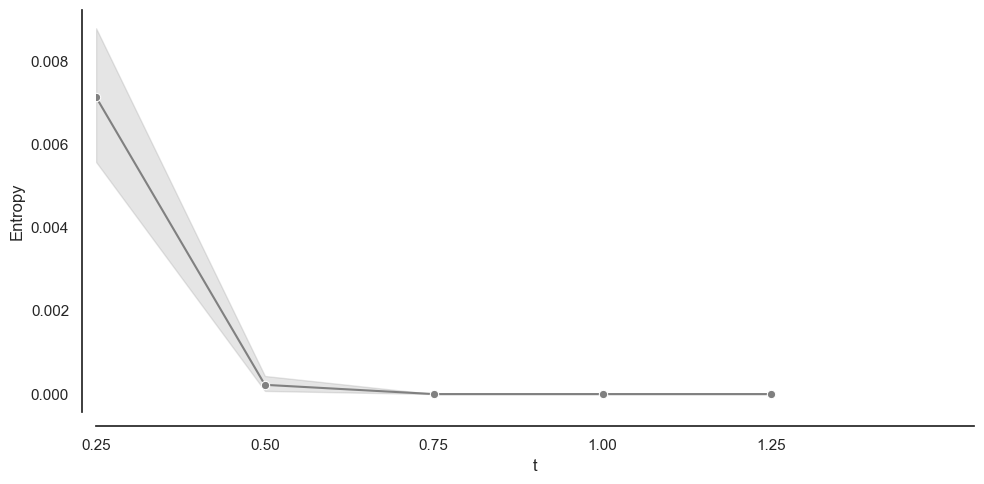

In [312]:
if a_type == 'tol':

  df = ENTROPY#.loc[ENTROPY['Subpopulations']==3, ]

  df.index= range(0,df.shape[0])

  sns.set(rc={"figure.figsize":(10,5)})
  sns.set_theme(palette='binary', style="white")
  fig, ax = plt.subplots()
  sns.lineplot(ax = ax,
             data = df,
             x = 'D',
             y = 'Entropy',
             sort = False,
             marker="o",
             #errorbar=('ci', 95),
             markers=True,
             color='gray')
  sns.despine(offset=10)#, trim=True)
  ax.set_xlim(0.45,1.55)
  ax.set_xticks([0.25,0.5,0.75,1,1.25])#,1.5])
  plt.xlabel('t')
  #plt.title('(c) Elbow method for DGP (iii) - Bernoulli')
  plt.tight_layout()

  plt.savefig(str(ran_var) + "_" + str(ran_int) + "_" + str(n_fix) + "_" + "elbow" + "_" + str(model) + "_" + str(a_type) + ".pdf")

plt.show()

In [311]:
if a_type == 'alpha':

  df = ENTROPY#.loc[ENTROPY['Subpopulations']==3, ]

  df.index= range(0,df.shape[0])

  sns.set(rc={"figure.figsize":(10,5)})
  sns.set_theme(palette='binary', style="white")
  fig, ax = plt.subplots()
  sns.lineplot(ax = ax,
             data = df,
             x = 'D',
             y = 'Entropy',
             sort = False,
             marker="o",
             #errorbar=('ci', 95),
             markers=True,
             color='gray')
  sns.despine(offset=10)#, trim=True)
  ax.set_xlim(0,0.1)
  ax.set_xticks([0.01, 0.05,0.1])#,1.5])
  plt.xlabel('α')
  #plt.title('(c) Elbow method for DGP (iii) - Bernoulli')
  plt.tight_layout()

  plt.savefig(str(ran_var) + "_" + str(ran_int) + "_" + str(n_fix) + "_" + "elbow" + "_" + str(model) + "_" + str(a_type) + ".pdf")

plt.show()